### Anastomosing demo overview

Anchors:
- `analog_image_generator.geologic_generators.generate_anastomosing`
- `analog_image_generator.stacked_channels.build_stacked_fluvial`
- `analog_image_generator.stats.compute_metrics`
- `analog_image_generator.reporting.build_reports`

Use this notebook to demonstrate the features listed below. Fill in the upcoming sections (presets, generator runs, stacked packages, metrics, reporting, and debugging hooks) before the professor review.


# Fluvial Anastomosing Anchors
Linking GEOLOGIC_RULES entries to helper implementations.


#### Demo checklist

- [ ] Parameter presets for branches/marsh/fans
- [ ] Single-belt generator demo with marsh/fan overlays
- [ ] Stacked package showing marsh-rich units
- [ ] Visualization (branch_channel, marsh, fan) + legend
- [ ] Metrics summary
- [ ] Reporting hook
- [ ] Debug controls


In [1]:
from analog_image_generator import geologic_generators as gg

ANASTO_BASELINE = {
    "style": "anastomosing",
    "height": 256,
    "width": 256,
    "seed": 314,
    "branch_count": gg._ANASTO_DEFAULTS["branch_count"],
    "levee_width_px": gg._ANASTO_DEFAULTS["levee_width_px"],
    "levee_height_scale": gg._ANASTO_DEFAULTS["levee_height_scale"],
    "marsh_fraction": gg._ANASTO_DEFAULTS["marsh_fraction"],
    "fan_length_px": gg._ANASTO_DEFAULTS["fan_length_px"],
}

MARSH_HEAVY = {
    **ANASTO_BASELINE,
    "marsh_fraction": 0.65,
    "branch_count": 4,
}

STACKED_WETLAND = {
    **ANASTO_BASELINE,
    "mode": "stacked",
    "package_count": 2,
    "package_styles": ["anastomosing", "meandering"],
    "package_relief_px": 16,
    "package_erosion_depth_px": 10,
}

ANASTO_PRESETS = {
    "baseline": ANASTO_BASELINE,
    "marsh_heavy": MARSH_HEAVY,
    "stacked_wetland": STACKED_WETLAND,
}
ANASTO_PRESETS

{'baseline': {'style': 'anastomosing',
  'height': 256,
  'width': 256,
  'seed': 314,
  'branch_count': 3,
  'levee_width_px': 6.0,
  'levee_height_scale': 0.65,
  'marsh_fraction': 0.45,
  'fan_length_px': 35.0},
 'marsh_heavy': {'style': 'anastomosing',
  'height': 256,
  'width': 256,
  'seed': 314,
  'branch_count': 4,
  'levee_width_px': 6.0,
  'levee_height_scale': 0.65,
  'marsh_fraction': 0.65,
  'fan_length_px': 35.0},
 'stacked_wetland': {'style': 'anastomosing',
  'height': 256,
  'width': 256,
  'seed': 314,
  'branch_count': 3,
  'levee_width_px': 6.0,
  'levee_height_scale': 0.65,
  'marsh_fraction': 0.45,
  'fan_length_px': 35.0,
  'mode': 'stacked',
  'package_count': 2,
  'package_styles': ['anastomosing', 'meandering'],
  'package_relief_px': 16,
  'package_erosion_depth_px': 10}}

In [2]:
from analog_image_generator import geologic_generators as gg
from analog_image_generator import stacked_channels as sc

def run_single_anasto(params: dict) -> tuple:
    config = {**ANASTO_PRESETS['baseline'], **params}
    return gg.generate_fluvial(config)

def run_stacked_anasto(params: dict) -> tuple:
    config = {**ANASTO_PRESETS['stacked_wetland'], **params}
    return sc.build_stacked_fluvial(config)

single_anasto = run_single_anasto({})
stacked_anasto = run_stacked_anasto({})
single_anasto[0].shape, stacked_anasto[0].shape

((256, 256), (256, 256))

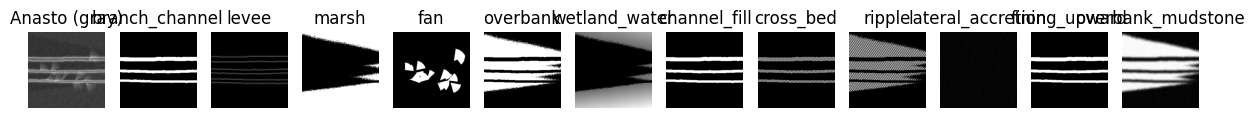

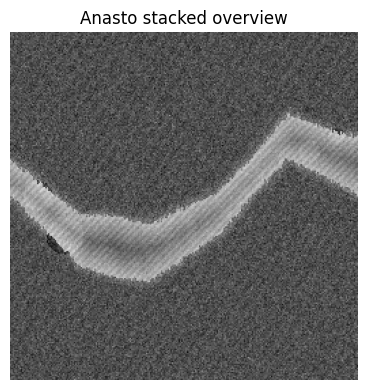

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def _mask_arrays(masks_dict):
    arrays = []
    for name, value in masks_dict.items():
        if isinstance(value, np.ndarray) and value.ndim >= 2:
            arrays.append((name, value.astype(np.float32)))
    return arrays

def _plot_masks(analog, masks_dict, title: str):
    arrays = _mask_arrays(masks_dict)
    fig, axes = plt.subplots(1, len(arrays) + 1, figsize=(12, 4))
    axes[0].imshow(analog, cmap='gray', vmin=0.0, vmax=1.0)
    axes[0].set_title(f"Anasto (gray)")
    axes[0].axis('off')
    for ax, (name, mask) in zip(axes[1:], arrays):
        ax.imshow(mask, cmap='gray', vmin=0.0, vmax=1.0)
        ax.set_title(name)
        ax.axis('off')
    fig.tight_layout()

analog_single, masks_single = single_anasto
_plot_masks(analog_single, masks_single, 'Anasto single run')

analog_stacked, masks_stacked = stacked_anasto
fig = plt.figure(figsize=(6, 4))
plt.imshow(analog_stacked, cmap='gray', vmin=0.0, vmax=1.0)
package_map = masks_stacked.get('package_id_map')
if isinstance(package_map, np.ndarray) and package_map.ndim >= 2:
    plt.contour(package_map, levels=6, colors='r', linewidths=0.4)
plt.title('Anasto stacked overview')
plt.axis('off')
fig.tight_layout()

## anchor-fluvial-anasto-paths
`anasto_paths(H, W, branch_count, rng)` lays out narrow branches.

## anchor-fluvial-anasto-levees
`add_levees_narrow(branch_channel, width_px, height_scale)` builds thin levees.

## anchor-fluvial-anasto-marsh
`make_marsh(branch_channel, marsh_fraction, rng, shape)` derives marsh/overbank masks.

## anchor-fluvial-anasto-fans
`seed_fans(breach_points, fan_length_px, rng, shape)` draws crevasse fans.

## anchor-fluvial-anasto-compose
`compose_anasto(gray, masks, noise_scale, rng)` normalizes grayscale output.

## anchor-fluvial-anasto-generate
`generate_anastomosing(params, rng)` orchestrates branches, levees, marshes, fans, and metadata.

## anchor-sedimentary-approximations
Sedimentary overlays in this notebook use simplified distance-to-mask gradients, Gaussian-smoothed noise, and deterministic laminae frequencies (no fully resolved laminae or grain-scale physics). Mineralogy percentages are constrained heuristics (`feldspar`, `quartz`, `clay`) summing to 1.0; cement signatures toggle between kaolinite/calcite based on marsh coverage, and mud_clasts_bool reflects overbank fraction. These approximations target qualitative realism for previews/statistics rather than exact petrophysical fidelity.


### anchor-fluvial-stack-relief

`analog_image_generator.stacked_channels.apply_relief_slice` lifts each package by the requested thickness/relief and `cut_erosional_surface` trims older stacks before the next deposit, 
producing the boundary masks that feed stacked stats. Use these helpers whenever stacked previews or QA notebooks highlight erosional relief assumptions.

### anchor-fluvial-anasto-compose

Automated anchor placeholder for GEOLOGIC_RULES mapping.

### anchor-fluvial-anasto-fans

Automated anchor placeholder for GEOLOGIC_RULES mapping.

### anchor-fluvial-anasto-generate

Automated anchor placeholder for GEOLOGIC_RULES mapping.

### anchor-fluvial-anasto-levees

Automated anchor placeholder for GEOLOGIC_RULES mapping.

### anchor-fluvial-anasto-marsh

Automated anchor placeholder for GEOLOGIC_RULES mapping.

### anchor-fluvial-anasto-paths

Automated anchor placeholder for GEOLOGIC_RULES mapping.